# Visualizing data  
Visualizing data is an important part of exploratory data analysis, since graphs tend to make more intuitive sense than looking at numbers. We'll be working with Amsterdam house price data and initially using our glimpse techniques to see if there are issues, what kinds of visualization we can do with the data, and if we need to do any feature engineering.

In [1]:
import pandas as pd

In [2]:
houseprices_whole = pd.read_csv('HousingPricesData.csv')
houseprices_whole.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
Address,"Blasiusstraat 8 2, Amsterdam","Kromme Leimuidenstraat 13 H, Amsterdam","Zaaiersweg 11 A, Amsterdam","Tenerifestraat 40, Amsterdam","Winterjanpad 21, Amsterdam"
Zip,1091 CR,1059 EL,1097 SM,1060 TH,1036 KN
Price,685000.0,475000.0,850000.0,580000.0,720000.0
Area,64,60,109,128,138
Room,3,3,4,6,5
Lon,4.907736,4.850476,4.944774,4.789928,4.902503
Lat,52.356157,52.348586,52.343782,52.343712,52.410538


In [3]:
# dropping address, longitude and latitude
houseprices = houseprices_whole[['Zip', 'Price', 'Area', 'Room']]
houseprices.shape

(924, 4)

In [4]:
houseprices.dtypes

Zip       object
Price    float64
Area       int64
Room       int64
dtype: object

In [7]:
# create a new column, use .loc syntax for both new and old columns
houseprices.loc[:, 'PricePerSqm'] = houseprices.loc[:, 'Price']/houseprices.loc[:, 'Area']

Sometimes we may want to change the data type of one or more columns before beginning visualization, such as float to int or removing characters from numeric data. Zip is not really a numeric field so it's fine that it's an object here

## Install and import matplotlib

In [11]:
#pip install matplotlib
# already installed

In [9]:
import matplotlib.pyplot as plt

In [12]:
houseprices.head()

,Zip,Price,Area,Room,PricePerSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


In [13]:
# create a new dataframe with rows sorted on house price from largest to smallest
houseprices_sorted = houseprices.sort_values('Price', ascending = False)
houseprices_sorted.head()

,Zip,Price,Area,Room,PricePerSqm
195,1017 EL,5950000.0,394,10,15101.522843
837,1075 AH,5850000.0,480,14,12187.500000
305,1016 AE,4900000.0,623,13,7865.168539
103,1017 ZP,4550000.0,497,13,9154.929577
179,1012 JS,4495000.0,178,5,25252.808989


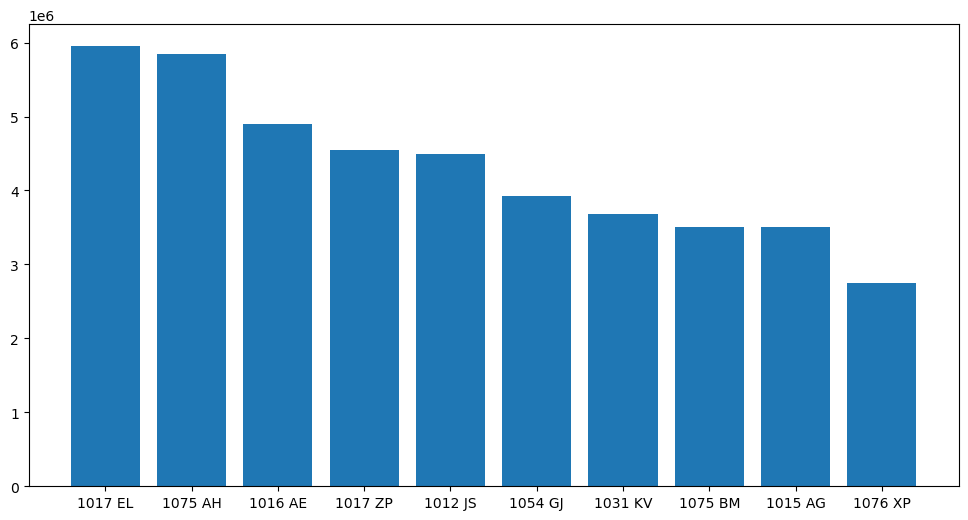

In [14]:
# set up the plot size horizontal by vertical
plt.figure(figsize = (12,6))
# assign columns from the dataframe to x and y
x = houseprices_sorted['Zip'][0:10] # we aren't plotting the whole data set, just the first slice
y = houseprices_sorted['Price'][0:10] # I wonder if we could set the x and y slices to different values
# decide the type of graph
plt.bar(x, y) # we might need more variables depending on the type of graph
plt.show()

So this graph is the price in millions of the ten most expensive properties. Not very useful on its own--I'd compare the average price in the zip code to this graph, which I think would be an interesting result.

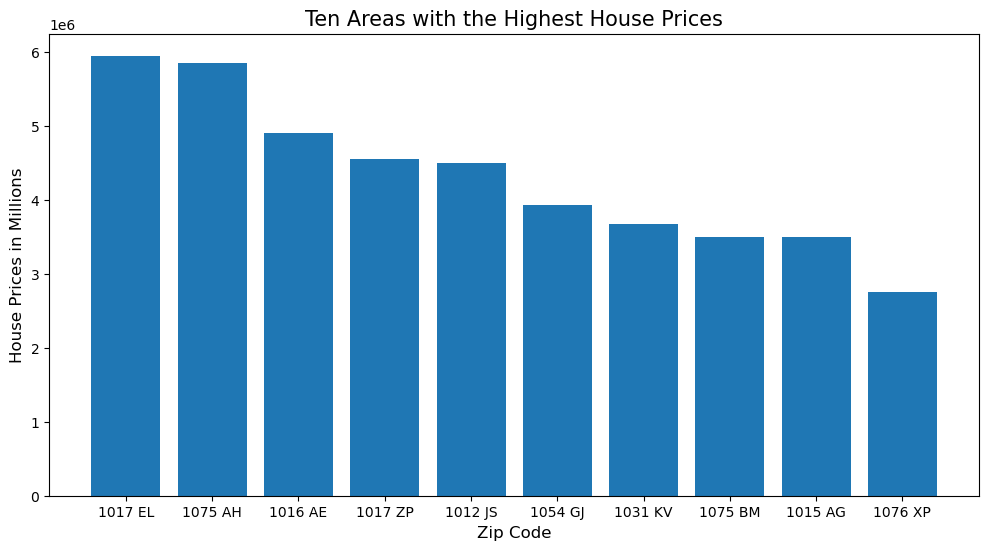

In [15]:
# adding all the labels to make it easier to understand
plt.figure(figsize = (12, 6))
plt.bar(x, y)
plt.title('Ten Areas with the Highest House Prices', fontsize = 15)
plt.xlabel('Zip Code', fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel('House Prices in Millions', fontsize = 12)
plt.yticks(fontsize = 10)
plt.show()

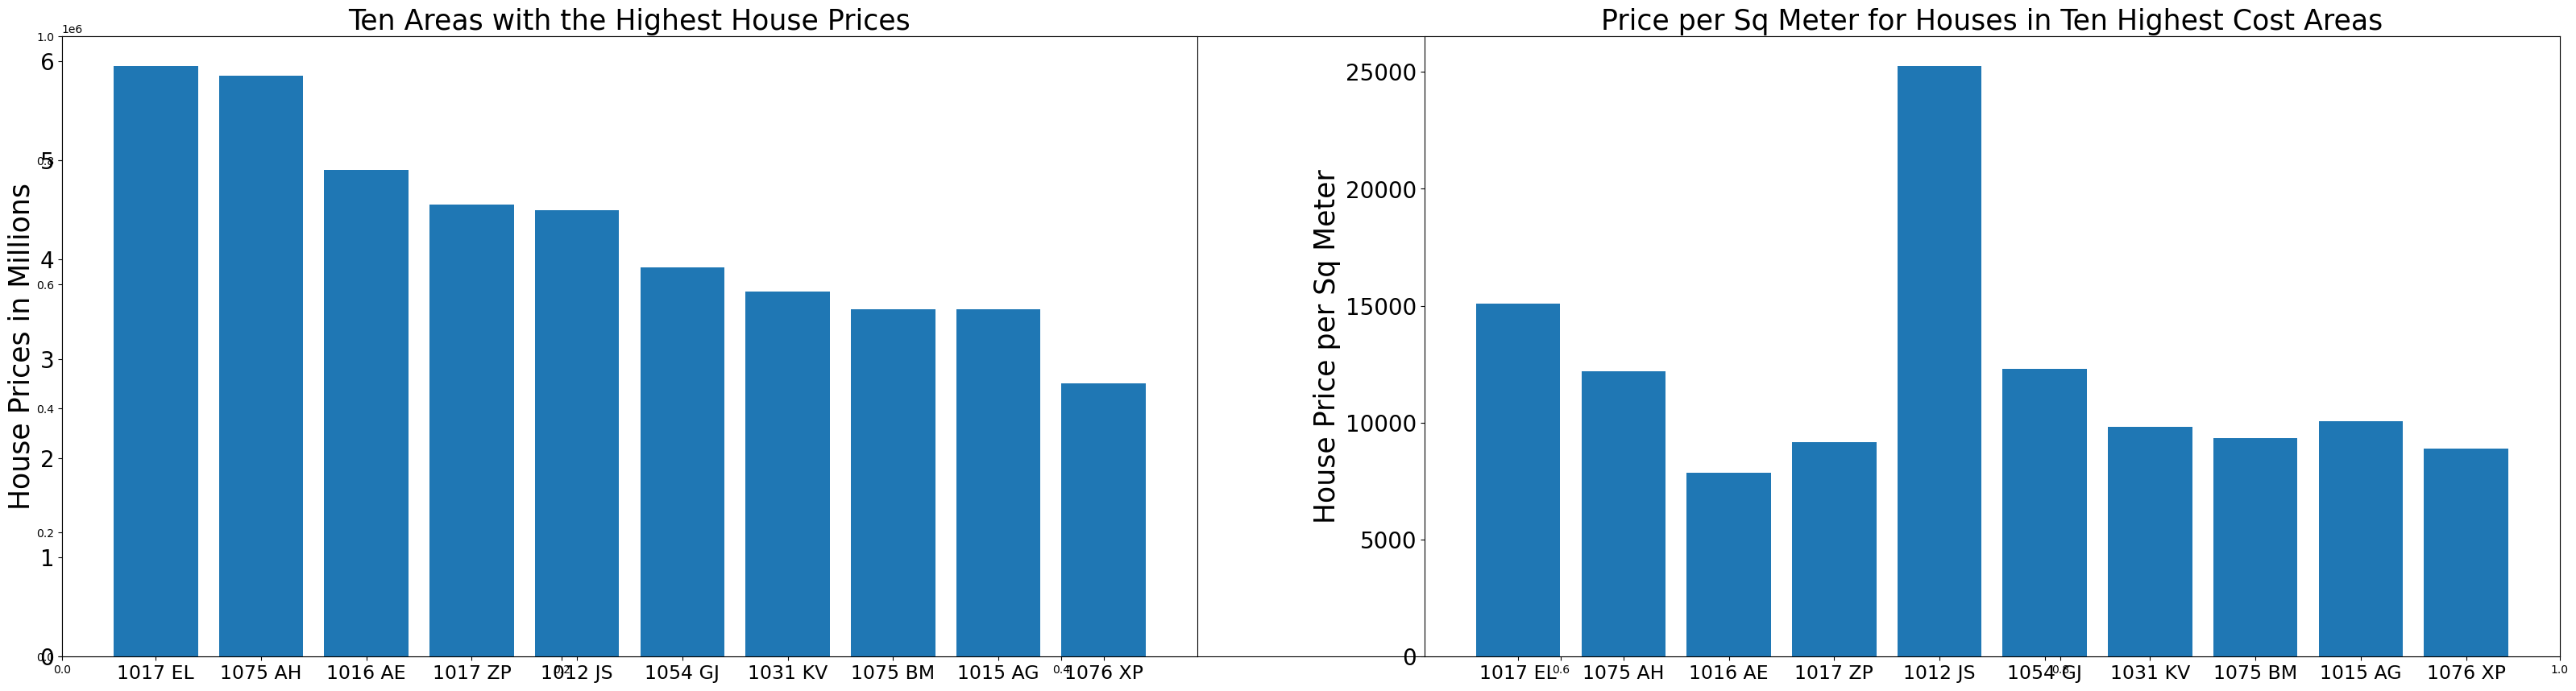

In [16]:
# create two graphs at once
fig, ax = plt.subplots(figsize = (40, 10))
# set x and y variables: result will be a comparison between absolute price and price compared to size by zip
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
y2 = houseprices_sorted['PricePerSqm'][0:10]
# first plot
plt.subplot(1, 2, 1) # numbers correspond to rows, columns, index
plt.bar(x, y)
plt.xticks(fontsize = 17)
plt.ylabel('House Prices in Millions', fontsize = 25)
plt.yticks(fontsize = 20)
plt.title('Ten Areas with the Highest House Prices', fontsize = 25)
# second plot
plt.subplot(1, 2, 2)
plt.bar(x, y2)
plt.xticks(fontsize = 17)
plt.ylabel('House Price per Sq Meter', fontsize = 25)
plt.yticks(fontsize = 20)
plt.title('Price per Sq Meter for Houses in Ten Highest Cost Areas', fontsize = 25)
plt.show()

### Deviation from book topic  
I really want to graph the average price by zip, so I'm going to spend a bit of time figuring out how to aggregate and then graph some more.

In [17]:
houseprices_agg = houseprices.copy()

In [18]:
houseprices_agg.head()

,Zip,Price,Area,Room,PricePerSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


In [19]:
houseprices_agg = houseprices_agg[['Zip', 'Price', 'PricePerSqm']]

In [27]:
houseprices_agg['AvgPrice'] = houseprices_agg.groupby('Zip')['Price'].mean()
houseprices_agg.head()

,Zip,Price,PricePerSqm,AvgPrice
0,1091 CR,685000.0,10703.125000,NaN
1,1059 EL,475000.0,7916.666667,NaN
2,1097 SM,850000.0,7798.165138,NaN
3,1060 TH,580000.0,4531.250000,NaN
4,1036 KN,720000.0,5217.391304,NaN


Hmmm, why is my new column for average price null?

In [28]:
houseprices_agg.groupby('Zip')['Price'].mean()

Zip
1011 AR    1425000.0
1011 AW     640000.0
1011 BG     469000.0
1011 BS    1500000.0
1011 DG     999500.0
             ...    
1108 BR     325000.0
1108 CA     300000.0
1108 CN     350000.0
1109 BK     549001.0
1109 BW     475000.0
Name: Price, Length: 834, dtype: float64

Oh, of course--I need to drop Price before I can store a real value in the data frame

In [29]:
# this is a ChatGPT method
avg_prices = houseprices_agg.groupby('Zip', as_index=False)['Price'].mean()
avg_prices.rename(columns={'Price': 'Avg_Price'}, inplace=True)

print(avg_prices)


         Zip  Avg_Price
0    1011 AR  1425000.0
1    1011 AW   640000.0
2    1011 BG   469000.0
3    1011 BS  1500000.0
4    1011 DG   999500.0
..       ...        ...
829  1108 BR   325000.0
830  1108 CA   300000.0
831  1108 CN   350000.0
832  1109 BK   549001.0
833  1109 BW   475000.0

[834 rows x 2 columns]


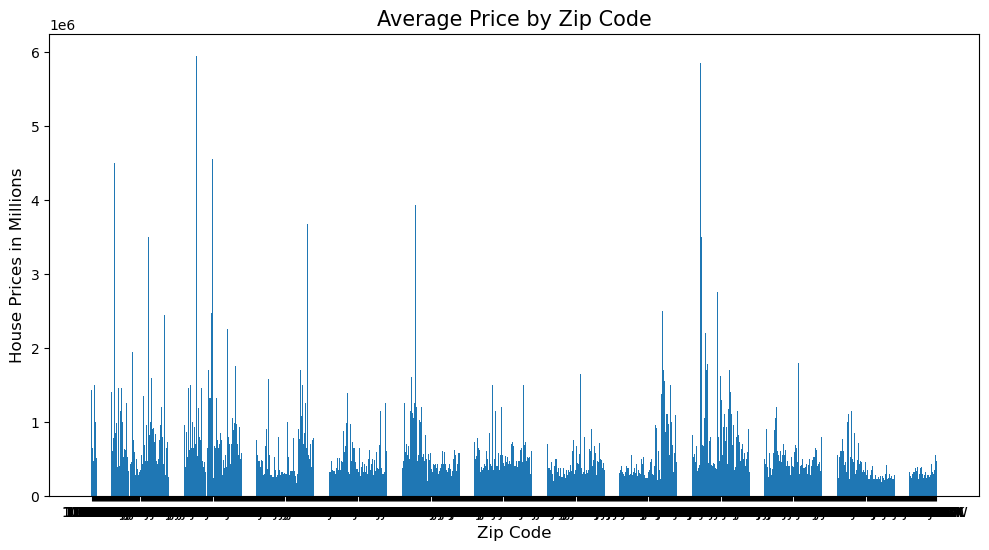

In [30]:
plt.figure(figsize = (12, 6))
x = avg_prices['Zip']
y = avg_prices['Avg_Price']
plt.bar(x, y)
plt.title('Average Price by Zip Code', fontsize = 15)
plt.xlabel('Zip Code', fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel('House Prices in Millions', fontsize = 12)
plt.yticks(fontsize = 10)
plt.show()

Immediate realization: this is unreadable. No wonder the book works with the top 10! I would need to sort the df first, then could easily slice a bit off one end or the other.

In [31]:
avg_price_sorted = avg_prices.sort_values('Avg_Price', ascending = False)
avg_price_sorted.head()

,Zip,Avg_Price
103,1017 EL,5950000.0
600,1075 AH,5850000.0
77,1016 AE,4900000.0
119,1017 ZP,4550000.0
22,1012 JS,4495000.0


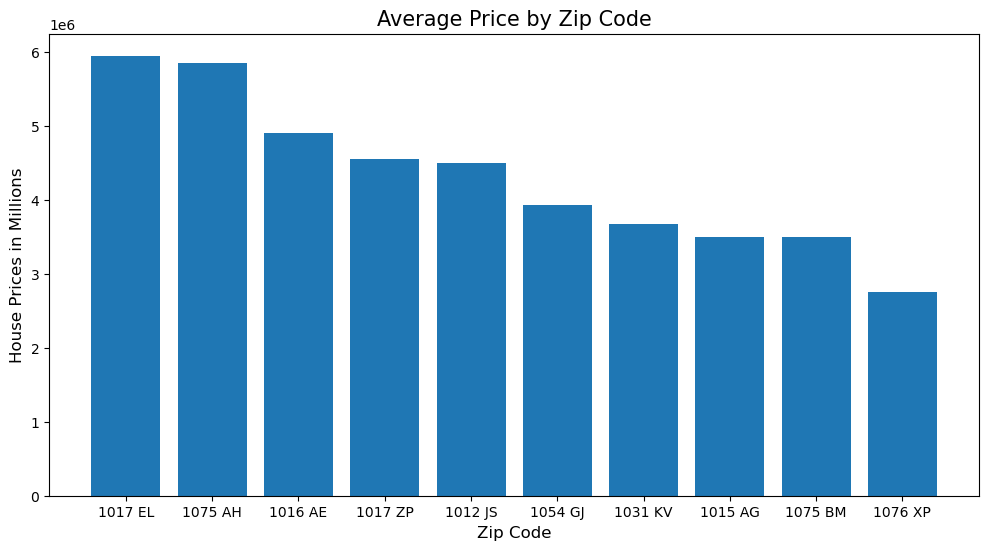

In [32]:
plt.figure(figsize = (12, 6))
x = avg_price_sorted['Zip'][0:10]
y = avg_price_sorted['Avg_Price'][0:10]
plt.bar(x, y)
plt.title('Average Price by Zip Code', fontsize = 15)
plt.xlabel('Zip Code', fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylabel('House Prices in Millions', fontsize = 12)
plt.yticks(fontsize = 10)
plt.show()

Now, let's see if we can put the top 10 individual houses vs the average most expensive house by zip

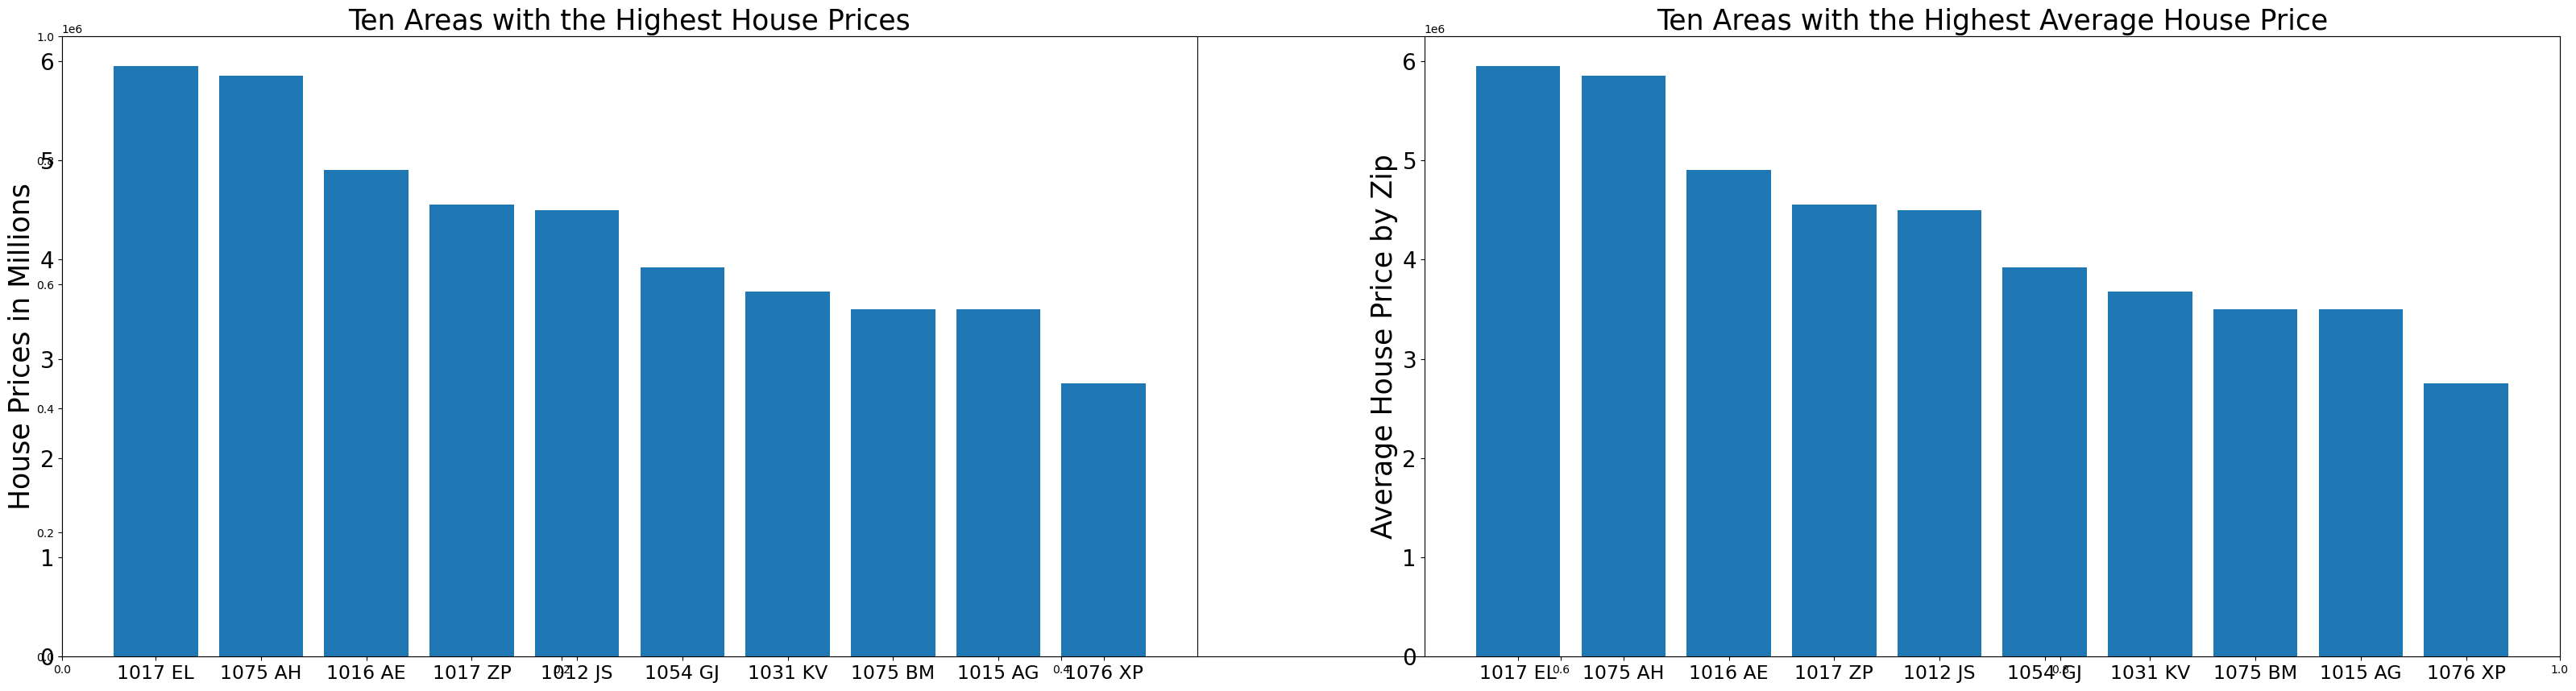

In [33]:
# create two graphs at once
fig, ax = plt.subplots(figsize = (40, 10))
# set x and y variables: result will be a comparison between absolute price and price compared to size by zip
x = houseprices_sorted['Zip'][0:10]
x2 = avg_price_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
y2 = avg_price_sorted['Avg_Price'][0:10]
# first plot
plt.subplot(1, 2, 1) # numbers correspond to rows, columns, index
plt.bar(x, y)
plt.xticks(fontsize = 17)
plt.ylabel('House Prices in Millions', fontsize = 25)
plt.yticks(fontsize = 20)
plt.title('Ten Areas with the Highest House Prices', fontsize = 25)
# second plot
plt.subplot(1, 2, 2)
plt.bar(x, y2)
plt.xticks(fontsize = 17)
plt.ylabel('Average House Price by Zip', fontsize = 25)
plt.yticks(fontsize = 20)
plt.title('Ten Areas with the Highest Average House Price', fontsize = 25)
plt.show()

I'm really impressed at how exact the correspondence is! I wonder what the result would be if I grabbed the last 10 instead?

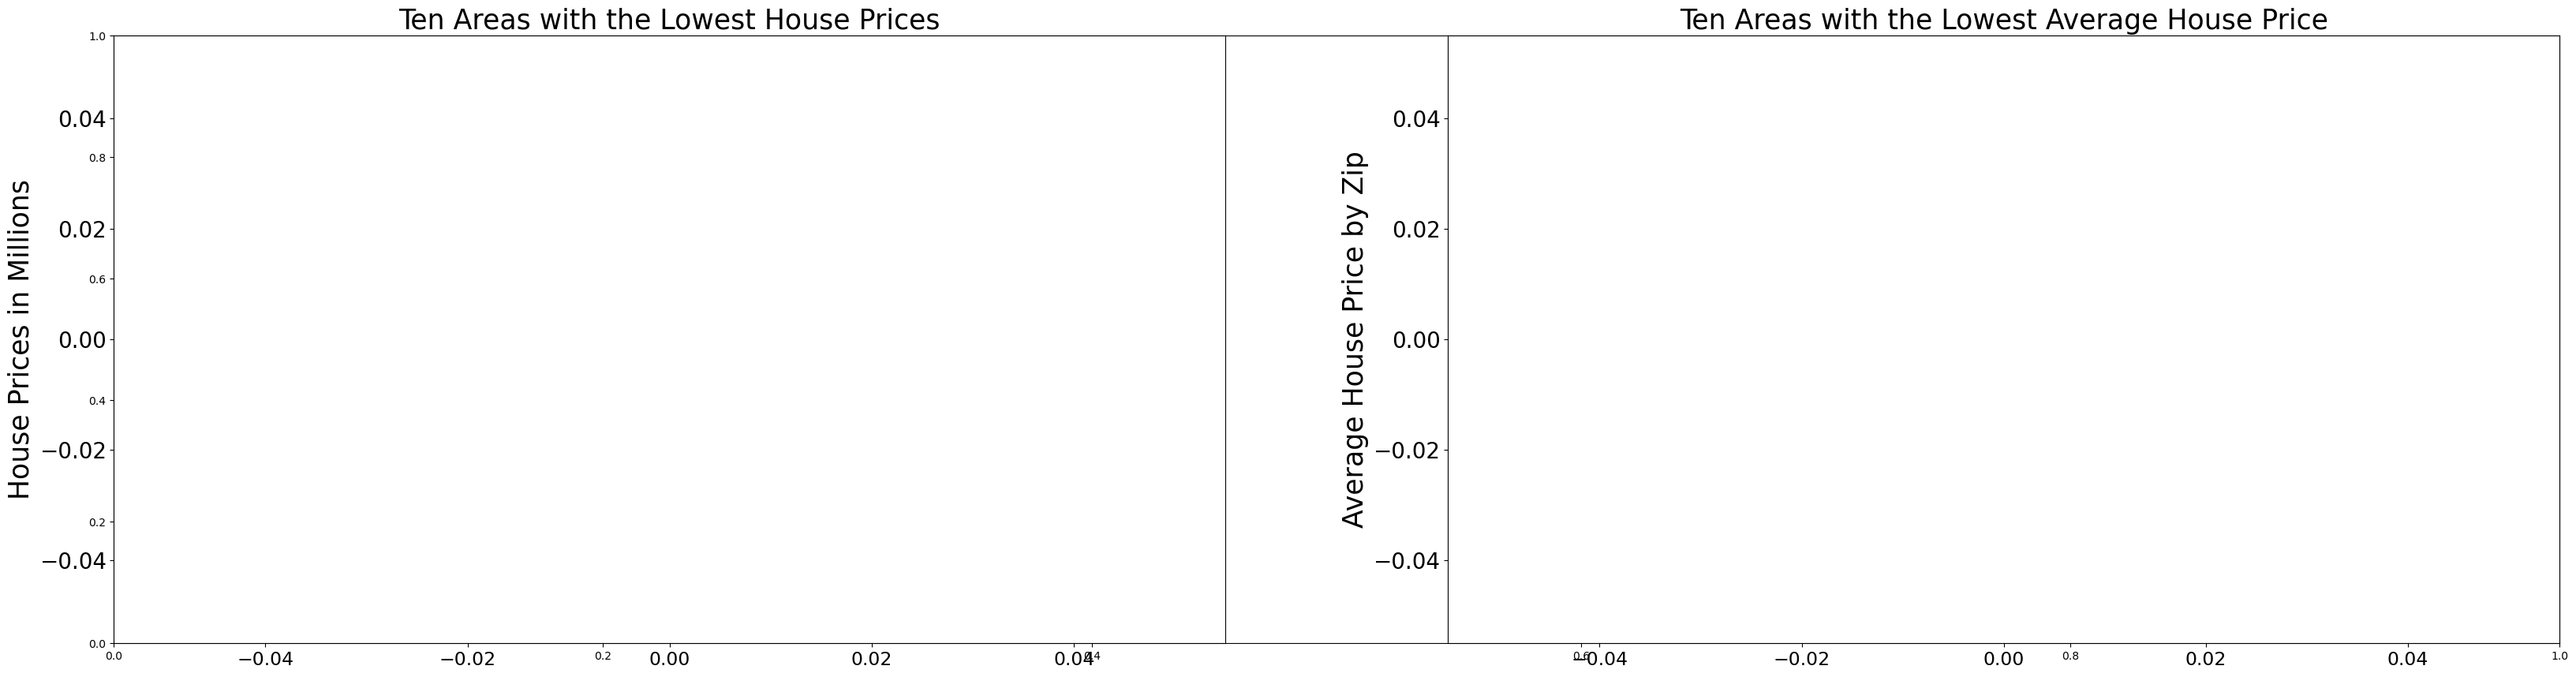

In [36]:
# create two graphs at once
fig, ax = plt.subplots(figsize = (40, 10))
# set x and y variables: result will be a comparison between absolute price and average price by zip
x = houseprices_sorted['Zip'][-1:-10]
x2 = avg_price_sorted['Zip'][-1:-10]
y = houseprices_sorted['Price'][-1:-10]
y2 = avg_price_sorted['Avg_Price'][-1:-10]
# first plot
plt.subplot(1, 2, 1) # numbers correspond to rows, columns, index
plt.bar(x, y)
plt.xticks(fontsize = 17)
plt.ylabel('House Prices in Millions', fontsize = 25)
plt.yticks(fontsize = 20)
plt.title('Ten Areas with the Lowest House Prices', fontsize = 25)
# second plot
plt.subplot(1, 2, 2)
plt.bar(x, y2)
plt.xticks(fontsize = 17)
plt.ylabel('Average House Price by Zip', fontsize = 25)
plt.yticks(fontsize = 20)
plt.title('Ten Areas with the Lowest Average House Price', fontsize = 25)
plt.show()

... did that even work? Can I use negative index in this context?

## Visualize with Seaborn  
Seaborn calls matplotlib behind the scenes but has fancier options for graphs

In [34]:
import seaborn as sns

<Axes: xlabel='Zip', ylabel='Price'>

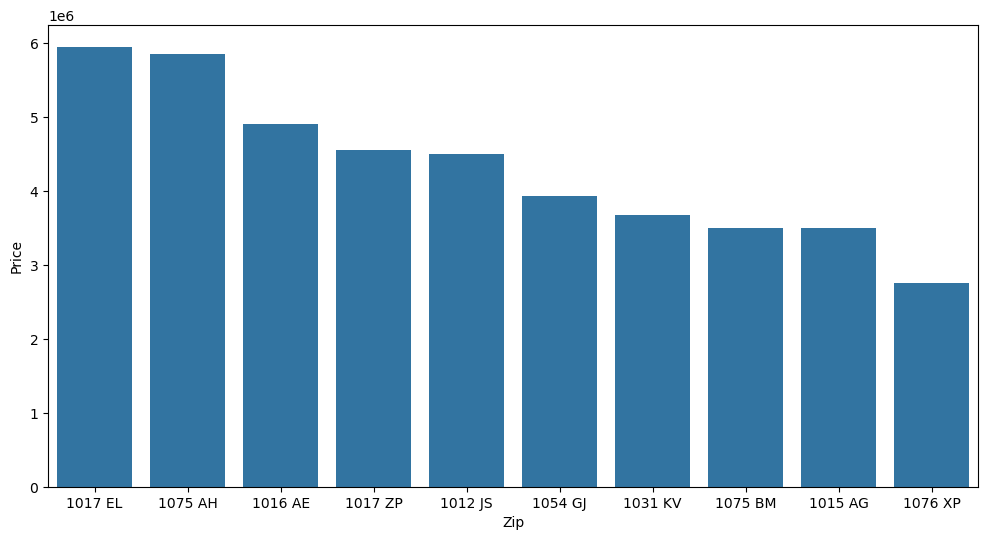

In [35]:
plt.figure(figsize = (12, 6))
data = houseprices_sorted[0:10]
sns.barplot(data = data, x = 'Zip', y = 'Price')

Text(0.5, 1.0, 'Ten Areas with Highest House Prices')

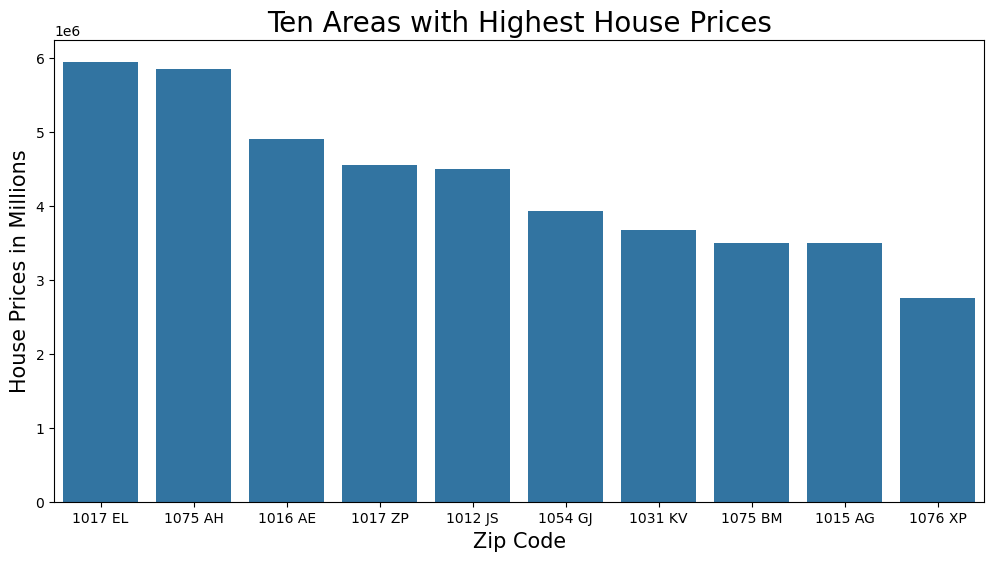

In [37]:
plt.figure(figsize = (12, 6))
data = houseprices_sorted[0:10]

ax = sns.barplot(data = data, x = 'Zip', y = 'Price')
ax.set_xlabel('Zip Code', fontsize = 15)
ax.set_ylabel('House Prices in Millions', fontsize = 15)
ax.set_title('Ten Areas with Highest House Prices', fontsize = 20)

Text(0.5, 1.0, 'Price per Sq Meter for Houses in Ten Highest Cost Areas')

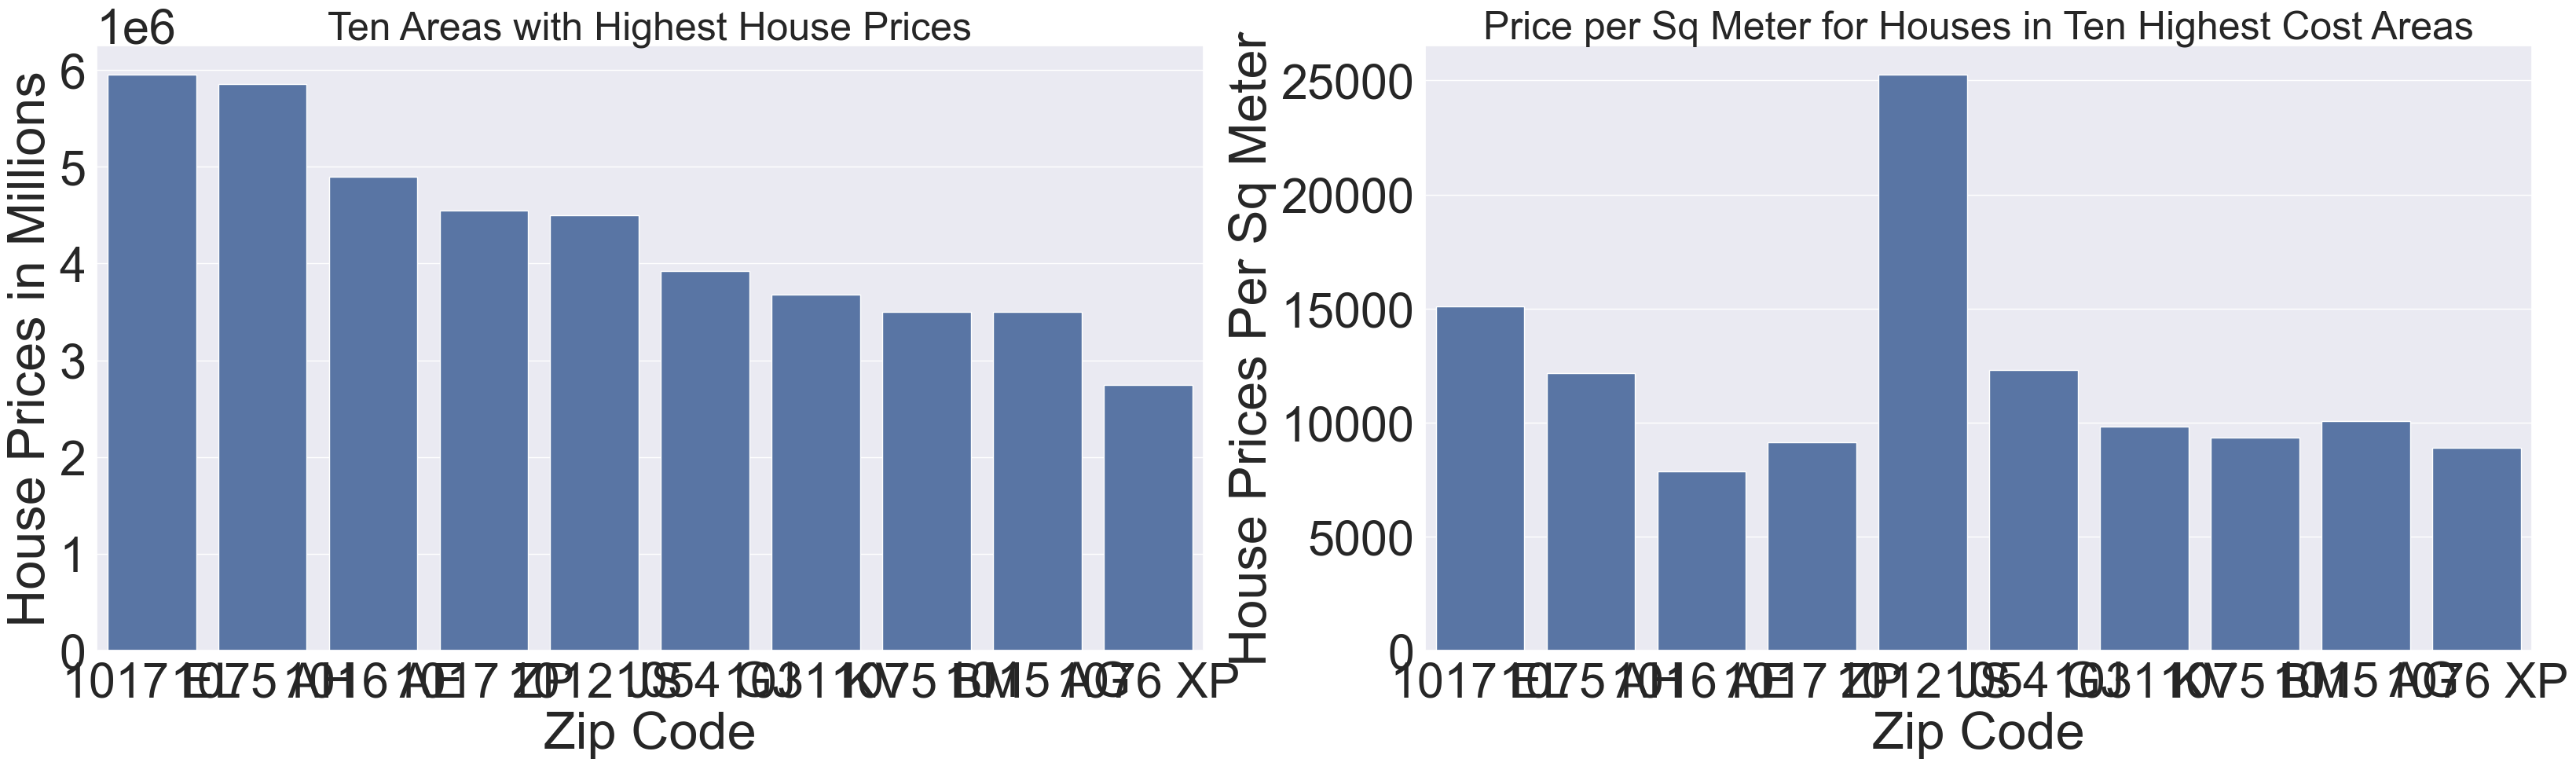

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (40, 10))
data = houseprices_sorted[0:10]

sns.set(font_scale = 3) # I like being able to set the scale instead of specifying each particular font size
ax1 = sns.barplot(data = data, x = 'Zip', y = 'Price', ax = ax[0])
ax1.set_xlabel('Zip Code')
ax1.set_ylabel('House Prices in Millions')
ax1.set_title('Ten Areas with Highest House Prices')

ax2 = sns.barplot(data = data, x = 'Zip', y = 'PricePerSqm', ax = ax[1]) # ax is determining which subplot we create
ax2.set_xlabel('Zip Code')
ax2.set_ylabel('House Prices Per Sq Meter')
ax2.set_title('Price per Sq Meter for Houses in Ten Highest Cost Areas')
# ah, you don't need to explicitly show the plot with Seaborn

## Visualize with GGPlot  
GGPlot was originally built in and for R. The Python implementation of GGPlot is plotnine.

In [43]:
pip install plotnine

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
from plotnine import *

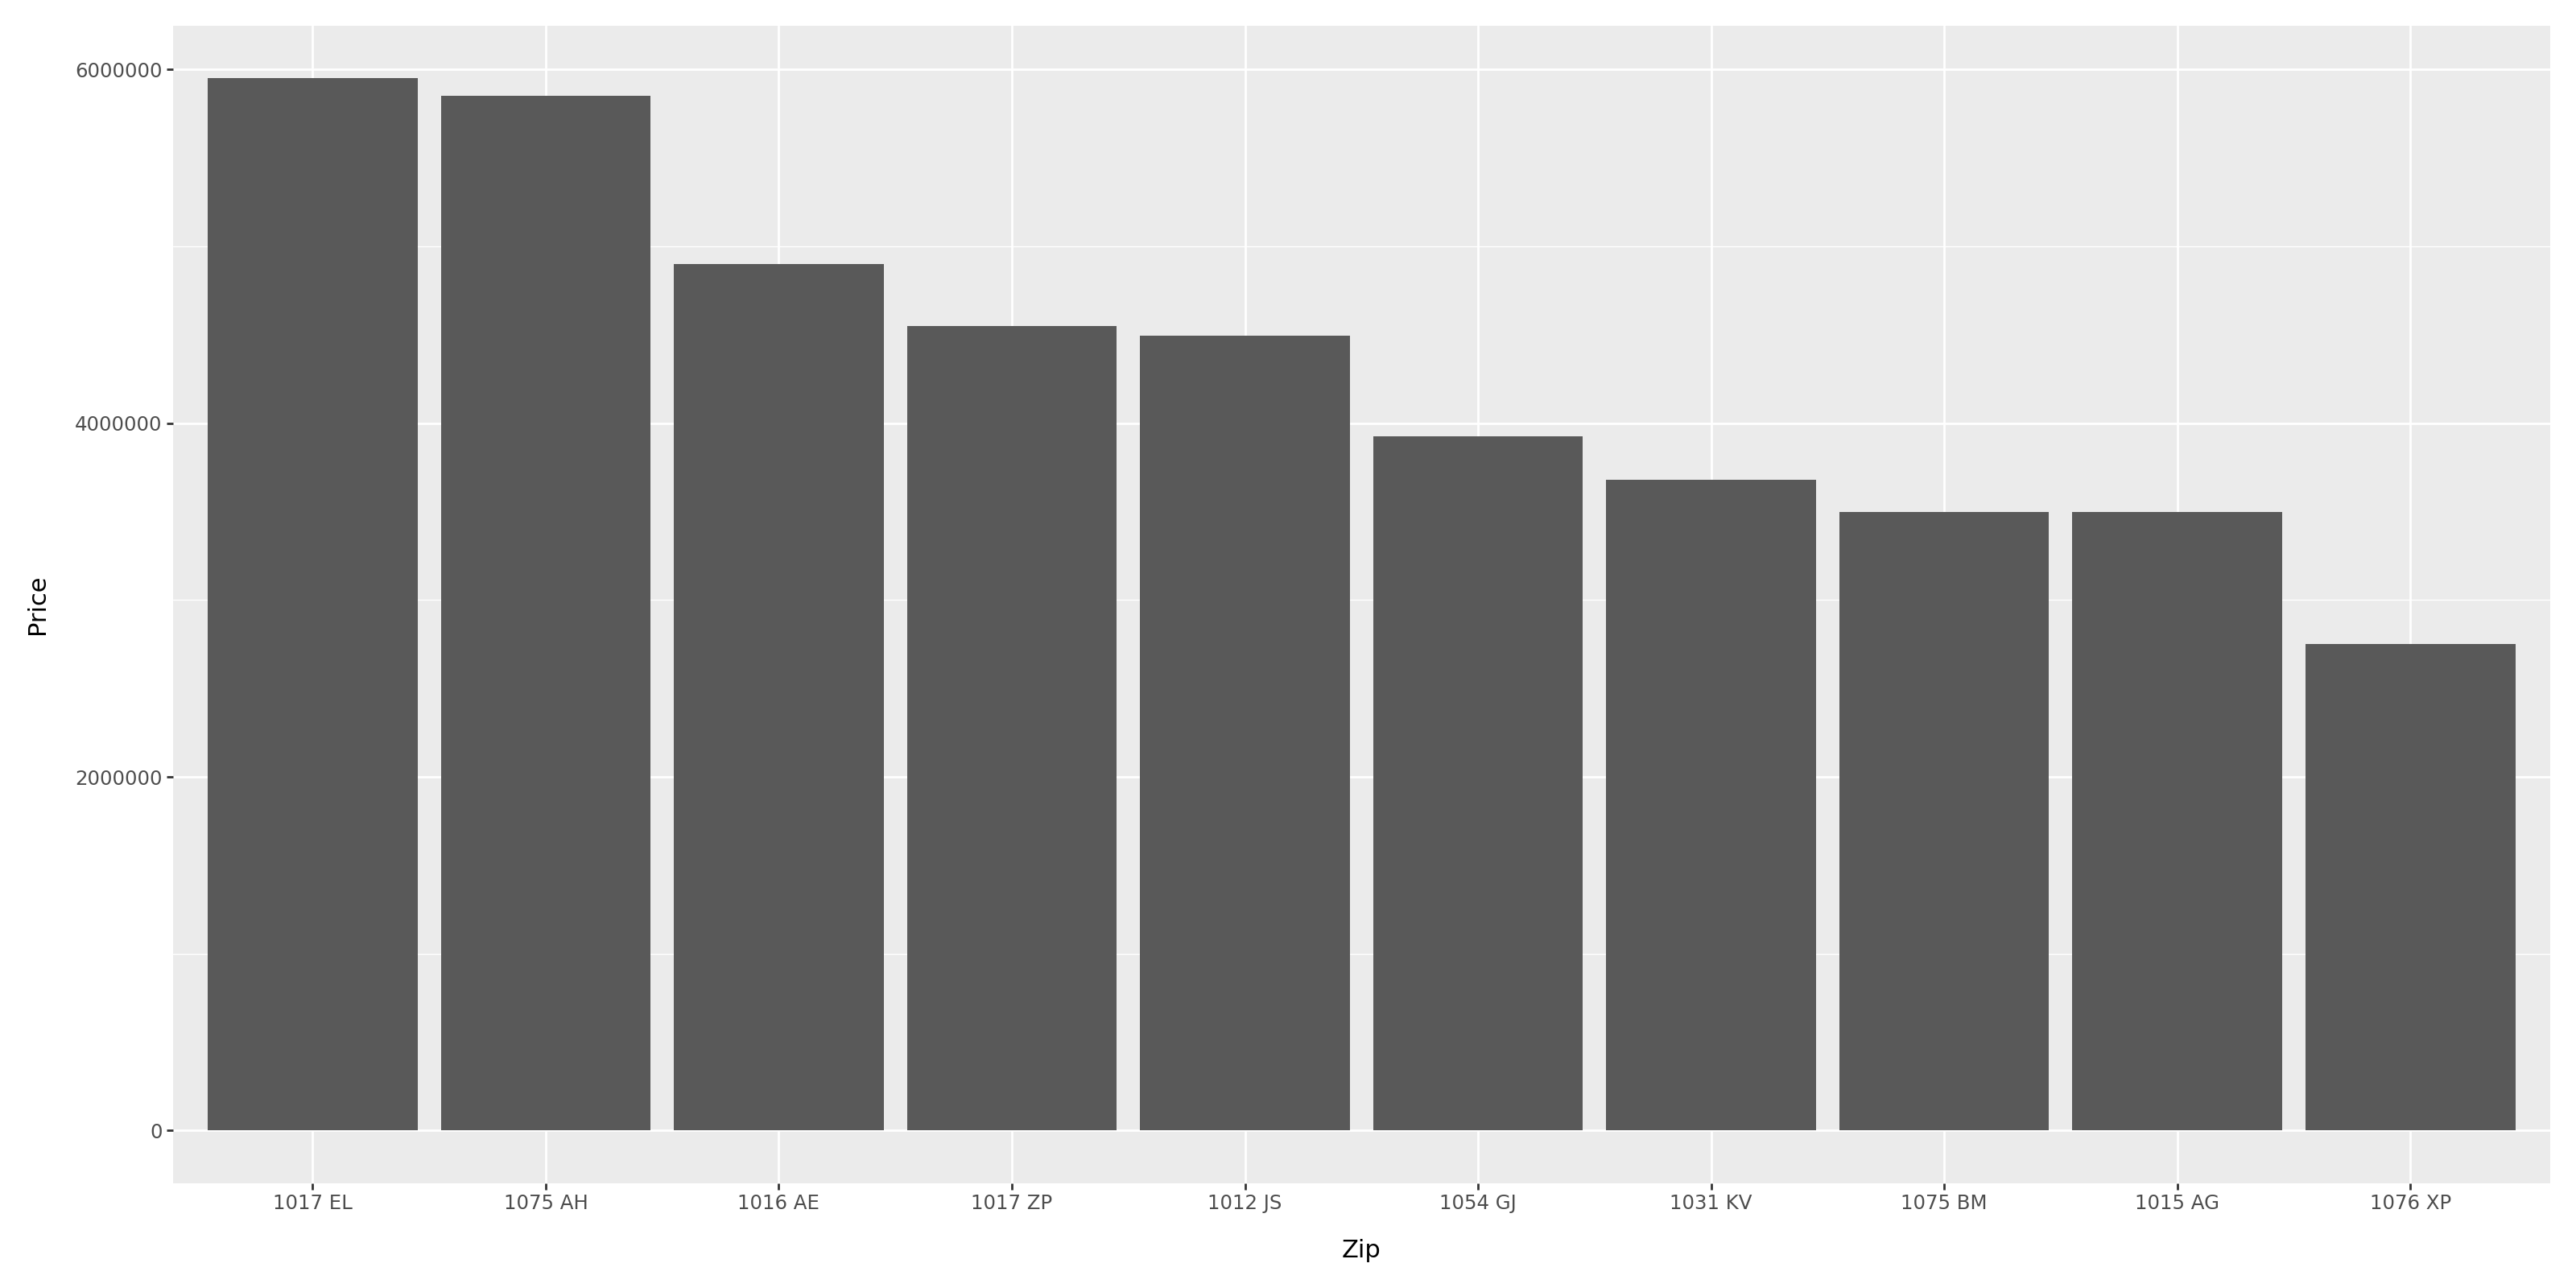

In [45]:
chart_data = houseprices_sorted[0:10]
ggplot(chart_data, aes(x = 'Zip', y = 'Price')) + geom_bar(stat = 'identity') + scale_x_discrete(limits = chart_data['Zip'].tolist()) + theme(figure_size = (16, 8))

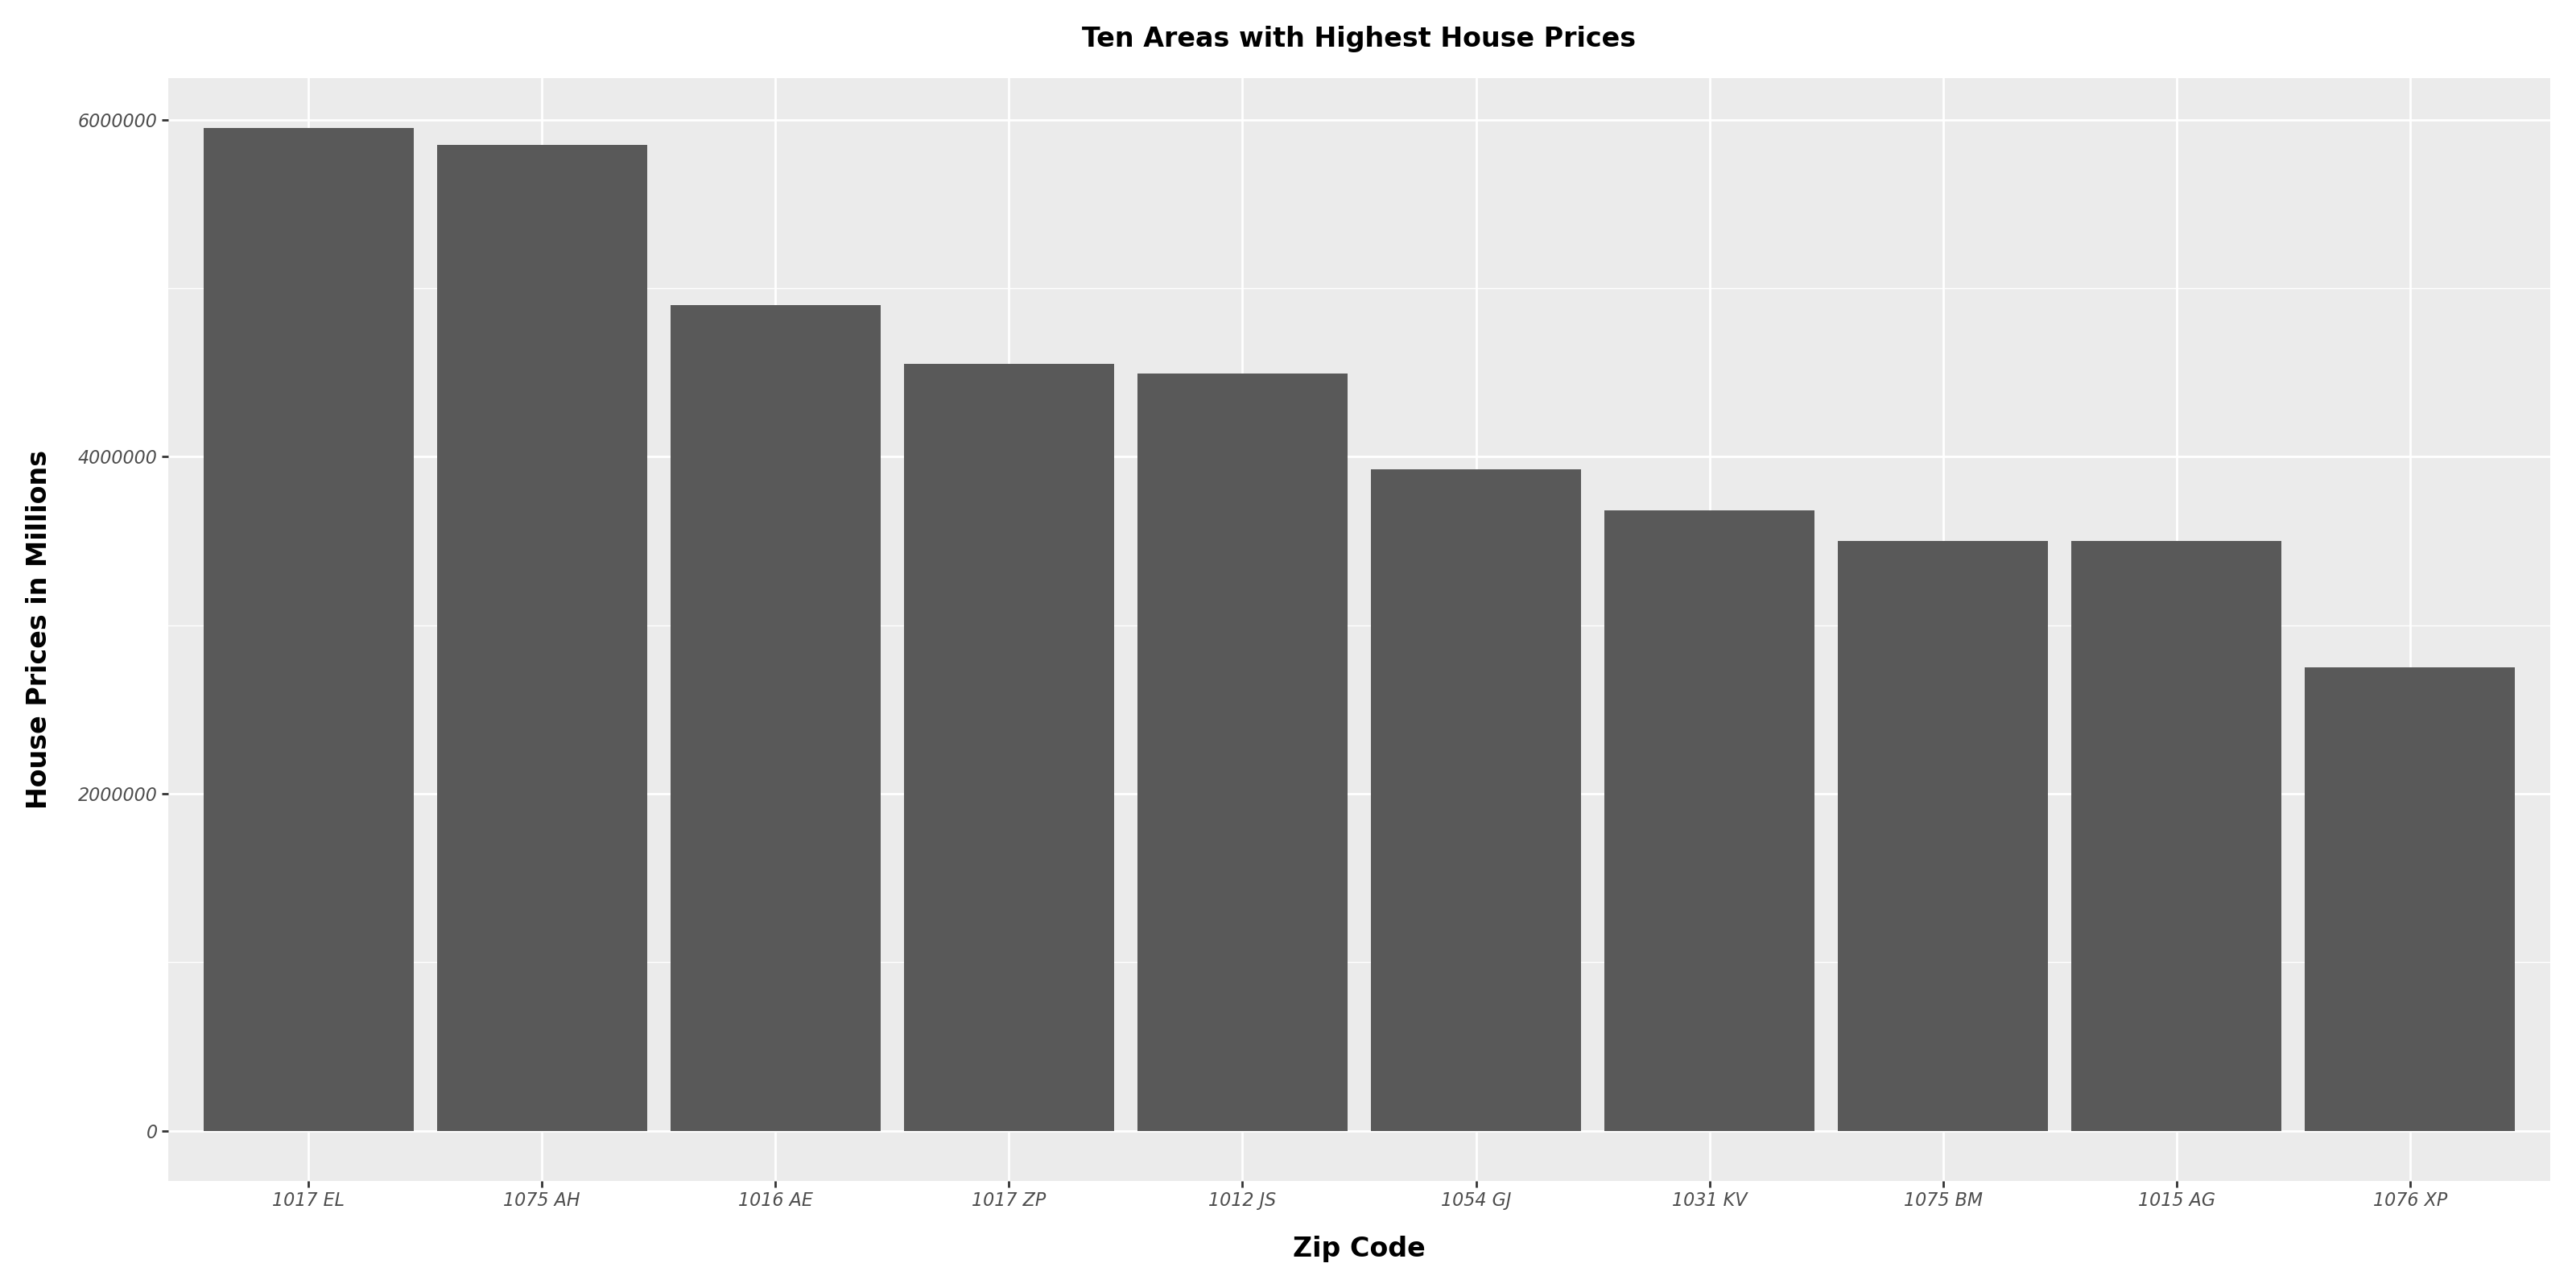

In [48]:
ggplot(chart_data, aes(x = 'Zip', y = 'Price')) + geom_bar(stat = 'identity') + scale_x_discrete(limits = chart_data['Zip'].tolist()) \
+ labs(y = 'House Prices in Millions', x = 'Zip Code', title = 'Ten Areas with Highest House Prices') + theme(figure_size = (16, 8),
     axis_title = element_text(face = 'bold', size = 12),
     axis_text = element_text(face = 'italic', size = 8),
     plot_title = element_text(face = 'bold', size = 12))

## Visualize using Bokeh

In [50]:
# pip install bokeh
# bokeh already installed

In [52]:
from bokeh.plotting import figure, show
import bokeh.plotting as bkplot
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [55]:
data = houseprices_sorted[0:10]

fig = figure(x_range = data['Zip'], width = 700, height = 500)
fig.vbar(x = data['Zip'], top = data['Price'], width = 0.9)
show(fig)

In [56]:
fig = figure(x_range = data['Zip'], width = 700, height = 500, title = 'Ten Areas with Highest House Prices', x_axis_label = 'Zip Code',
            y_axis_label = 'House Prices in Millions')
fig.vbar(x = data['Zip'], top = data['Price'], width = 0.9)

fig.xaxis.axis_label_text_font_size = '15pt'
fig.xaxis.major_label_text_font_size = '10pt'
fig.yaxis.axis_label_text_font_size = '15pt'
fig.yaxis.major_label_text_font_size = '10pt'
fig.title.text_font_size = '15pt'
show(fig)

In [57]:
p1 = figure(x_range = data['Zip'], width = 480, height = 400, title = 'Ten Areas with Highest House Prices', x_axis_label = 'Zip Code',
            y_axis_label = 'House Prices in Millions')

p1.vbar(x = data['Zip'], top = data['Price'], width = 0.9)

p2 = figure(x_range = data['Zip'], width = 480, height = 400, title = 'Price per Sq Meter in Areas with Highest House Prices', x_axis_label = 'Zip Code',
            y_axis_label = 'House Price Per Sq Meter')
p2.vbar(x = data['Zip'], top = data['PricePerSqm'], width = 0.9)

gp = bkplot.gridplot(children = [[p1, p2]])
bkplot.show(gp)

## End of visualization chapter

I want to play around more with different kinds of charts

In [60]:
houseprices_agg2 = houseprices.copy()

In [61]:
houseprices_agg2.head()

,Zip,Price,Area,Room,PricePerSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


In [62]:
houseprices_agg2['avgprice'] = houseprices_agg2.groupby('Zip')['Price'].transform('mean')

In [63]:
houseprices_agg2.head()

,Zip,Price,Area,Room,PricePerSqm,avgprice
0,1091 CR,685000.0,64,3,10703.125000,685000.0
1,1059 EL,475000.0,60,3,7916.666667,475000.0
2,1097 SM,850000.0,109,4,7798.165138,850000.0
3,1060 TH,580000.0,128,6,4531.250000,639500.0
4,1036 KN,720000.0,138,5,5217.391304,720000.0


In [64]:
houseprices_agg2_sorted = houseprices_agg2.sort_values('avgprice', ascending = False)

In [70]:
houseprices_agg2_select = houseprices_agg2_sorted[0:10]

<Axes: xlabel='Zip', ylabel='Price'>

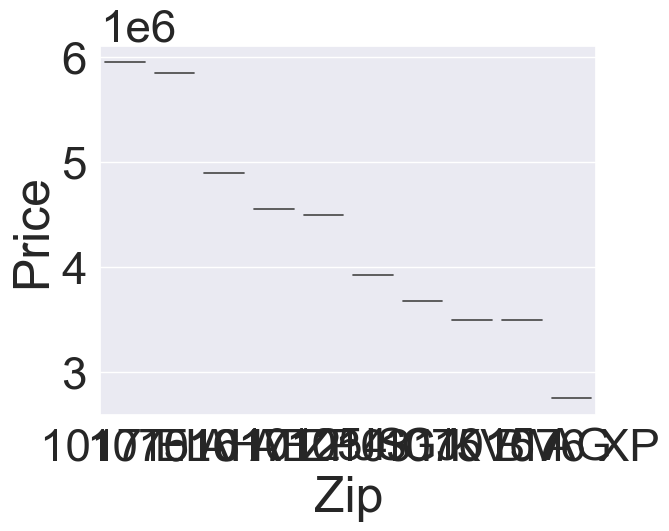

In [71]:
sns.violinplot(x = 'Zip', y = 'Price', data = houseprices_agg2_select)

In [72]:
# changing to the unaggregated data set
houseprices.head()

,Zip,Price,Area,Room,PricePerSqm
0,1091 CR,685000.0,64,3,10703.125000
1,1059 EL,475000.0,60,3,7916.666667
2,1097 SM,850000.0,109,4,7798.165138
3,1060 TH,580000.0,128,6,4531.250000
4,1036 KN,720000.0,138,5,5217.391304


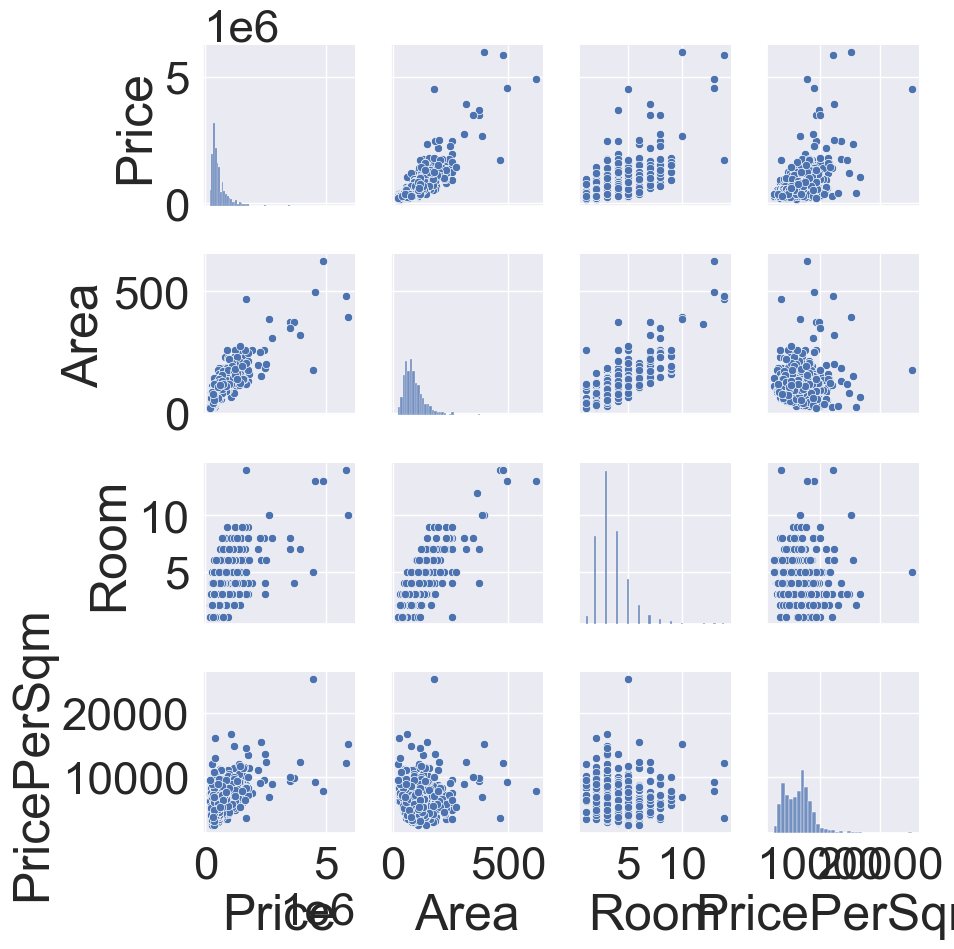

In [73]:
sns.pairplot(houseprices)

The presets of a pair plot, esp the text, is quite ugly. The visualization, though, is very interesting and seems likely to be very useful for EDA.